<a href="https://colab.research.google.com/github/JaehwanKim00/Bigdata_python/blob/main/Part02/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [1]:
import numpy as np
import pandas as pd

# np.random.randn(n) : 0~1개 사이의 균일한 분포를 갖는 난수 n개를 생성
# np.random.randint(min,max,size=n) : min~max 사이의 균일한 분포를 갖는 임의의 정수 n개를 생성
# np.random.randn(n) : 평균 0, 표준편차 1의 표준정규분포를 갖는 난수 n개를 생성
#                      평균 뮤와 표준편차 시그마의 정규분포를 갖는 난수를 생성하기 위해서는
#                      시그마 * random.randn(n) + 뮤의 식 사용


meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({'한국인':meat_consumption_korean,'일본인':meat_consumption_japan})

meat_consumption.head(10)

,한국인,일본인
0,60.354638,35.514724
1,58.785964,40.223120
2,58.120812,37.613327
3,54.737087,30.178183
4,59.295008,31.539537
5,51.671044,35.905657
6,56.562194,24.767155
7,47.430359,26.671709
8,56.843960,38.727647
9,54.076325,40.147985


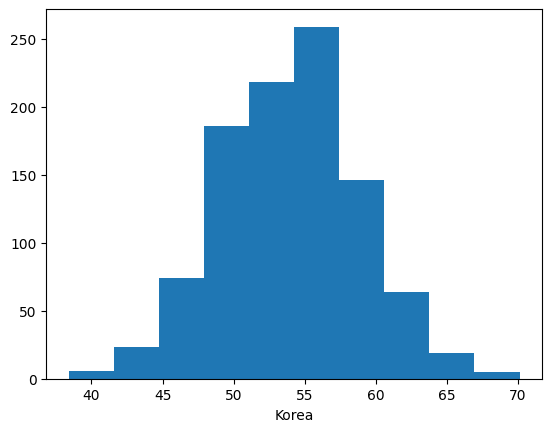

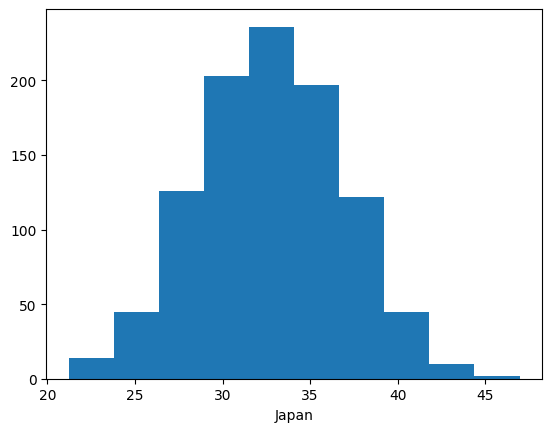

In [2]:
import matplotlib.pyplot as plt


plt.hist(meat_consumption_korean)
plt.xlabel('Korea')
plt.show()


plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

In [3]:
# Z - 표준화

import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/df_sample.csv')


mid_avg = np.mean(df['중간'])
mid_std = np.std(df['중간'])
df['중간_Z점수'] = (df['중간']-mid_avg)/mid_std

df.head()

,학번,중간,기말,리포트,퀴즈,중간_Z점수
0,S01,90,95,20,20,1.231167
1,S02,82,83,18,18,0.436866
2,S03,80,78,18,18,0.238290
3,S04,78,75,10,10,0.039715
4,S05,93,91,12,12,1.529030


In [4]:
import scipy.stats as ss
meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_korean)
meat_consumption['일본인_정규화'] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,60.354638,35.514724,1.297274,0.680338
1,58.785964,40.223120,0.979479,1.825321
2,58.120812,37.613327,0.844728,1.190674
3,54.737087,30.178183,0.159226,-0.617397
4,59.295008,31.539537,1.082605,-0.286344


In [5]:
# 다른 방식

meat_consumption['한국인_정규화2'] = (meat_consumption_korean - np.mean(meat_consumption_korean))/np.std(meat_consumption_korean)
meat_consumption['일본인_정규화2'] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,60.354638,35.514724,1.297274,0.680338,1.297274,0.680338
1,58.785964,40.223120,0.979479,1.825321,0.979479,1.825321
2,58.120812,37.613327,0.844728,1.190674,0.844728,1.190674
3,54.737087,30.178183,0.159226,-0.617397,0.159226,-0.617397
4,59.295008,31.539537,1.082605,-0.286344,1.082605,-0.286344


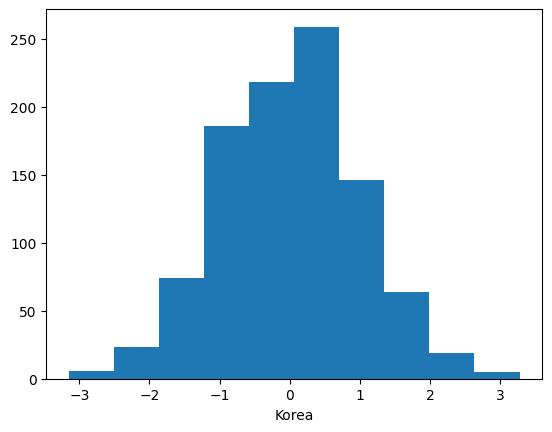

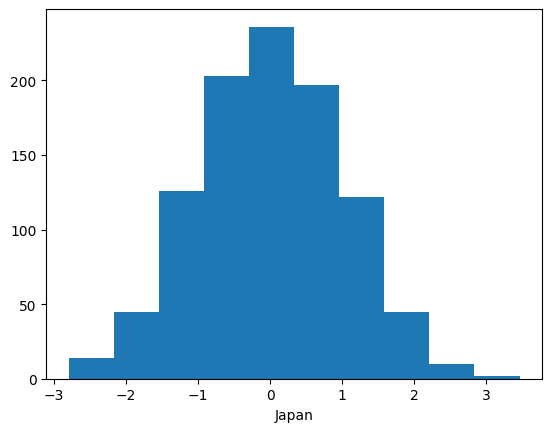

In [6]:
# 표준화된 히스토그램

plt.hist(meat_consumption['한국인_정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [7]:
# 사이킷런 이용한 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['한국인_정규화3'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = StandardScaler()
meat_consumption['일본인_정규화3'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,60.354638,35.514724,1.297274,0.680338,1.297274,0.680338,1.297274,0.680338
1,58.785964,40.223120,0.979479,1.825321,0.979479,1.825321,0.979479,1.825321
2,58.120812,37.613327,0.844728,1.190674,0.844728,1.190674,0.844728,1.190674
3,54.737087,30.178183,0.159226,-0.617397,0.159226,-0.617397,0.159226,-0.617397
4,59.295008,31.539537,1.082605,-0.286344,1.082605,-0.286344,1.082605,-0.286344


In [8]:
# Min-Max 정규화
# 연속형 변수의 값을 0~1 사이의 값으로 변환

fin_min = np.min(df['기말'])
fin_max = np.max(df['기말'])
df['기말_정규화'] = (df['기말']-fin_min)/(fin_max-fin_min)

df.head()

,학번,중간,기말,리포트,퀴즈,중간_Z점수,기말_정규화
0,S01,90,95,20,20,1.231167,1.000000
1,S02,82,83,18,18,0.436866,0.600000
2,S03,80,78,18,18,0.238290,0.433333
3,S04,78,75,10,10,0.039715,0.333333
4,S05,93,91,12,12,1.529030,0.866667


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption['한국인_mm'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = MinMaxScaler()
meat_consumption['일본인_mm'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption[['한국인','일본인','한국인_mm','일본인_mm']].head()

,한국인,일본인,한국인_mm,일본인_mm
0,60.354638,35.514724,0.692500,0.555478
1,58.785964,40.223120,0.643038,0.738402
2,58.120812,37.613327,0.622065,0.637010
3,54.737087,30.178183,0.515371,0.348150
4,59.295008,31.539537,0.659089,0.401039


In [10]:
# Min-Max 수식이용
Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption['한국인_mm2'] = (meat_consumption[['한국인']]-Min)/(Max-Min)

Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption['일본인_mm2'] = (meat_consumption[['일본인']]-Min)/(Max-Min)

meat_consumption[['한국인_mm','일본인_mm','한국인_mm2','일본인_mm2']].head()

,한국인_mm,일본인_mm,한국인_mm2,일본인_mm2
0,0.692500,0.555478,0.692500,0.555478
1,0.643038,0.738402,0.643038,0.738402
2,0.622065,0.637010,0.622065,0.637010
3,0.515371,0.348150,0.515371,0.348150
4,0.659089,0.401039,0.659089,0.401039


In [11]:
# 정규분포변환
# 왜도계산
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv')
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [12]:
import scipy.stats as ss

print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [13]:
# 로그변환
# 양의 왜도는 log(x), 음의 왜도는 log(max(x+1)-x)
df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS']+1)-df['PHYS'])

print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


In [14]:
# 로그10변환(X)
# 양의 왜도는 log10(x), 음의 왜도는 log10(max(x+1)-x)

df['CONT2'] = np.log10(df['CONT'])
df['PHYS2'] = np.log10(np.max(df['PHYS']+1)-df['PHYS'])

# 왜도계산
print(ss.skew(df['CONT2']))
print(ss.skew(df['PHYS2']))

0.6555571886692441
0.5824357748750438


73.5


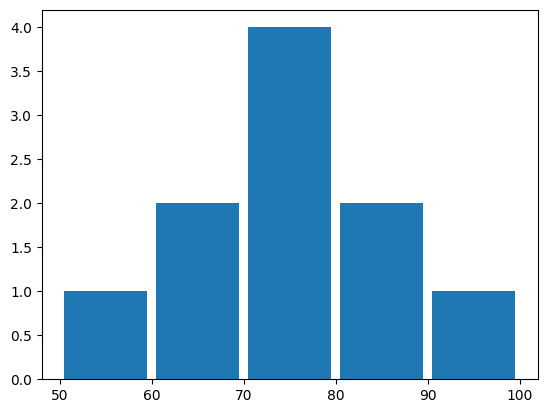

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [15]:
# 범주화 이산형화
# cut(),qcut()
52
data = [['철수',52],['영희',92],['미영',84],['시완',71],['미경',65],
        ['영환',81],['숙경',66],['부영',77],['민섭',73],['보연',74]]
df = pd.DataFrame(data,columns = ['이름','수학점수'])

print(np.mean(df['수학점수']))

plt.hist(df['수학점수'],bins=5,range=[50,100],rwidth = 0.9)
plt.show()
df

In [16]:
# 위 데이터 가직 등급 분류
df['등급'] = 0 # 0으로 초기화
df

,이름,수학점수,등급
0,철수,52,0
1,영희,92,0
2,미영,84,0
3,시완,71,0
4,미경,65,0
5,영환,81,0
6,숙경,66,0
7,부영,77,0
8,민섭,73,0
9,보연,74,0


In [17]:
# 조건 사용해서 구간 지정
df.loc[(df['수학점수']<60),'등급'] = 'F'
df.loc[(df['수학점수']>=60) & (df['수학점수']<70),'등급'] = 'D'
df.loc[(df['수학점수']>=70) & (df['수학점수']<80),'등급'] = 'C'
df.loc[(df['수학점수']>=80) & (df['수학점수']<90),'등급'] = 'B'
df.loc[(df['수학점수']>=90) & (df['수학점수']<=100),'등급'] = 'A'

df

<ipython-input-17-c405d5c035b4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['수학점수']<60),'등급'] = 'F'


,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [19]:
# cut 함수 활용
# 범위 지정해서 등급 부여
df['등급'] = pd.cut(x=df['수학점수'],
                    bins = [0,60,70,80,90,100],
                    labels = ['F','D','C','B','A'],
                    include_lowest =  True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [20]:
# qcut 함수 활용
# 동일한 개수의 등급 부여
df['등급_qcut'] = pd.qcut(x=df['수학점수'],q=5,labels = ['F','D','C','B','A'])
df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


In [21]:
# PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
# PCA는 연속형 변수만 사용
df = iris.drop(['species'],axis=1)
df_species = iris['species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
df.shape

(150, 5)

In [25]:
# PCA 진행 전 표준화나 정규화 수행
# 변수 정규화
from sklearn.preprocessing import StandardScaler
df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])
df['pethal_length'] = StandardScaler().fit_transform(df[['petal_length']])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape) # 원본 데이터셋이 (150,4)
print(pca.explained_variance_ratio_) # 차원의 기여도 2개의 요소만으로도 96% 정도 설명 가능

(150, 4)
[0.84405277 0.12891548 0.02140628 0.00562547]


In [ ]:
# 결측치 처리